In [1]:
import pandas as pd
import sys
import os
import glob
from collections import defaultdict, OrderedDict
from matplotlib import pyplot as plt
import seaborn as sns
import pprint
# from IPython.display import display
import sklearn
import numpy as np
import seaborn as sns
from Bio import SeqIO

from process_alignment_table import *

%matplotlib inline

In [2]:
set_pandas_display_options()

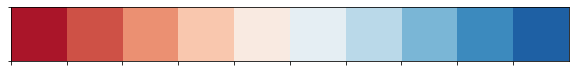

In [64]:
diverging_colors = sns.color_palette("RdBu", 10)
sns.palplot(diverging_colors)

In [65]:
diverging_colors.as_hex()

['#ab162a',
 '#cf5246',
 '#eb9172',
 '#fac8af',
 '#faeae1',
 '#e6eff4',
 '#bbdaea',
 '#7bb6d6',
 '#3c8abe',
 '#1e61a5']

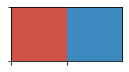

In [69]:
sns.palplot(['#cf5246', '#3c8abe'])

## Virus

In [3]:
directory = '/scratch/groups/dpwall/personal/chloehe/unmapped_reads/batch_tables'
df1 = pd.read_csv(f'{directory}/batch_00514/batch_00514.viral.csv', index_col=0)
df2 = pd.read_csv(f'{directory}/batch_01013/batch_01013.viral.csv', index_col=0)

In [4]:
batch = {}
for idx in df1.columns:
    batch[idx] = 'MTR-00514'
df1 = pd.concat([pd.DataFrame(batch, index=[0]), df1], axis=0)

batch = {}
for idx in df2.columns:
    batch[idx] = 'MTR-01013'
df2 = pd.concat([pd.DataFrame(batch, index=[0]), df2], axis=0)

df = pd.concat([df1, df2], axis=1)
df.rename(index={0: 'batch'}, inplace=True)
print(df.shape)

(60, 161)


In [5]:
batch = df.loc['batch']
batch = batch.drop('pop_average', axis=0)

In [6]:
from sklearn.preprocessing import normalize
df_copy = df.drop('pop_average', axis=1)
columns = []
for col, source, fam in zip(df_copy.columns.values, df_copy.loc['seq_source'].values, df_copy.loc['family'].values):
    columns.append(f'{col} - {source} - {fam}')
df_copy = df_copy.drop(['seq_source', 'family', 'relationship', 'batch'], axis=0)
    
cols = df_copy.columns
df_copy[cols] = df_copy[cols].apply(pd.to_numeric)

contig_df = pd.read_csv('/scratch/groups/dpwall/personal/chloehe/unmapped_reads/ref_genome/contig_df.csv', index_col=0)
index = []
for idx in df_copy.index.values:
    index.append(contig_df.loc[idx].short_des)
    
df_copy.columns = columns
df_copy.index = index
df_copy.T.head()

,Enterobacteria phage phiX174,Human parvovirus B19,Human herpesvirus 6B,Human herpesvirus 7,Cyprinid herpesvirus 3,Autographa californica nucleopolyhedrovirus,Saccharomyces cerevisiae killer virus M1,Encephalomyocarditis virus,Enterobacteria phage lambda,Human herpesvirus 4,Plutella xylostella multiple nucleopolyhedrovirus,"Glypta fumiferanae ichnovirus segment C9, complete sequence",Enterobacteria phage M13,Torque teno virus 19,Orgyia pseudotsugata MNPV,Human endogenous retrovirus K113 complete genome,Torque teno virus 8,Torque teno virus 3,Hepatitis C virus genotype 2,Phytophthora infestans RNA virus 1 RNA2A,Human herpesvirus 1,Torque teno virus 10,"Human betaherpesvirus 6A, variant A DNA, complete virion genome, isolate U1102",Simian virus 40,Human herpesvirus 6A,Propionibacterium phage PA6,Alcelaphine herpesvirus 1,Streptococcus phage Abc2,Streptococcus phage Sfi11,Torque teno virus 7,Enterobacteria phage T4,Streptococcus phage ALQ13.2,"Cotesia congregata bracovirus segment Circle9, complete sequence",Staphylococcus phage CNPH82,Lactococcus prophage bIL311,Pseudomonas phage YuA,Streptococcus phage SM1,Enterobacteria phage T7,Streptococcus phage 7201,Lactococcus prophage bIL309,Pseudomonas phage M6,Ovine herpesvirus 2,Human herpesvirus 5,Human herpesvirus 4 type 1,Gryllus bimaculatus nudivirus,Staphylococcus phage 92,Taterapox virus,Enterobacteria phage VT2-Sakai,Staphylococcus phage SA780ruMSSAST101,Pseudomonas phage D3,Enterococcus phage phiFL4A,Klebsiella phage phiKO2,Pseudomonas phage F10,Enterobacteria phage BP-4795,Pseudomonas phage PAJU2,Pseudomonas phage B3
07C63190 - LCL - AU1939,318010.0,0.0,0.0,0.0,28.0,4.0,15.0,5.0,2.0,1.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07C63191 - LCL - AU1939,504240.0,0.0,0.0,2046.0,17.0,1.0,12.0,2.0,4.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07C63192 - LCL - AU1939,461558.0,0.0,0.0,4.0,15.0,3.0,9.0,4.0,5.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07C63425 - LCL - AU1939,396870.0,0.0,0.0,0.0,9.0,15.0,13.0,1.0,4.0,6.0,3.0,1.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07C65103 - LCL - AU1806,314434.0,0.0,0.0,0.0,15.0,3.0,13.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_inverted = df_copy.T
batch.index = columns
df = pd.concat([batch, df_inverted], axis=1)

df_melt = pd.melt(df.reset_index(), id_vars=['index', 'batch'])
df_melt.rename(columns={'variable': 'virus', 'value': 'read counts'}, inplace=True)

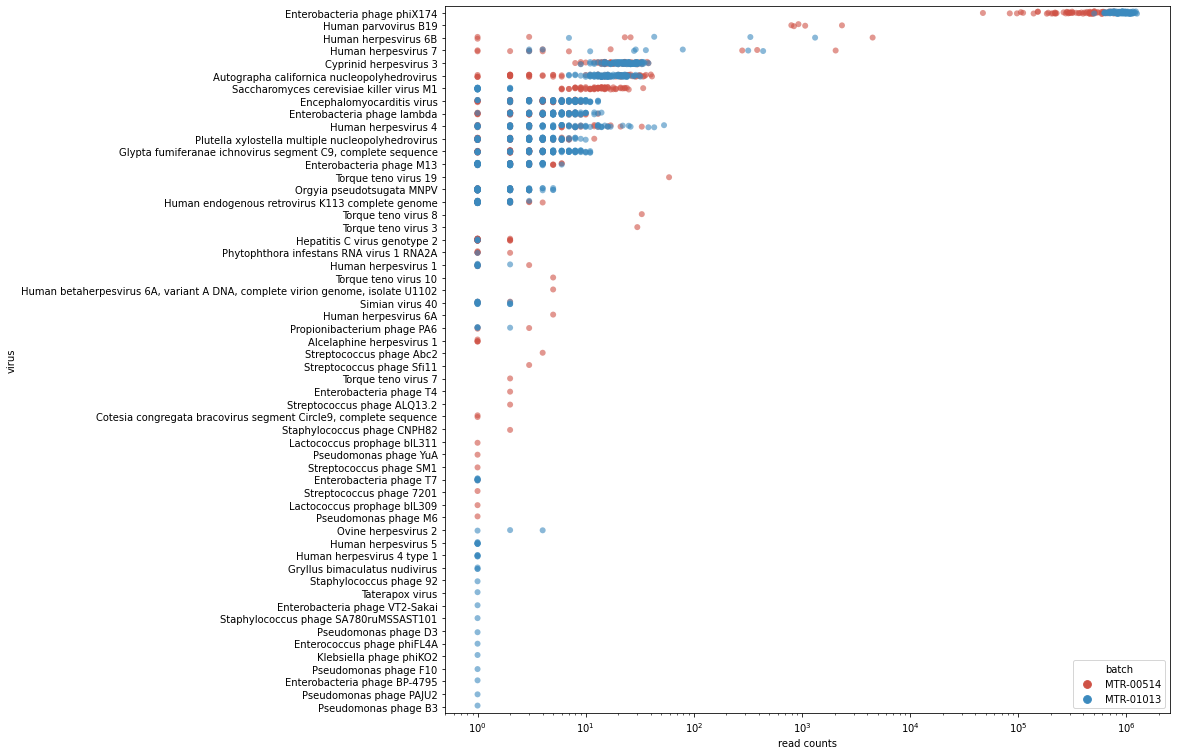

In [15]:
fig, ax = plt.subplots(figsize=(13,13))
ax.set(xscale="log")
chart = sns.stripplot(data=df_melt, x='read counts', y='virus', hue='batch', orient='h', alpha=0.8,
                      linewidth=1, size=6, edgecolor='white', palette=['#cf5246', '#3c8abe'])
plt.show()

## Bacteria/Eukaryote/Archaea

In [28]:
directory = '/scratch/groups/dpwall/personal/chloehe/unmapped_reads/batch_tables'
df1 = pd.read_csv(f'{directory}/batch_00514/batch_00514.bacterial.csv', index_col=0)
df2 = pd.read_csv(f'{directory}/batch_01013/batch_01013.bacterial.csv', index_col=0)

In [29]:
batch = {}
for idx in df1.columns:
    batch[idx] = 'MTR-00514'
df1 = pd.concat([pd.DataFrame(batch, index=[0]), df1], axis=0)

batch = {}
for idx in df2.columns:
    batch[idx] = 'MTR-01013'
df2 = pd.concat([pd.DataFrame(batch, index=[0]), df2], axis=0)

df = pd.concat([df1, df2], axis=1)
df.rename(index={0: 'batch'}, inplace=True)
print(df.shape)

(6697, 161)


In [30]:
batch = df.loc['batch']
batch = batch.drop('pop_average', axis=0)

In [32]:
from sklearn.preprocessing import normalize
df_copy = df.drop('pop_average', axis=1)
columns = []
for col, source, fam in zip(df_copy.columns.values, df_copy.loc['seq_source'].values, df_copy.loc['family'].values):
    columns.append(f'{col} - {source} - {fam}')
df_copy = df_copy.drop(['seq_source', 'family', 'relationship', 'batch'], axis=0)
    
cols = df_copy.columns
df_copy[cols] = df_copy[cols].apply(pd.to_numeric)

contig_df = pd.read_csv('/scratch/groups/dpwall/personal/chloehe/unmapped_reads/ref_genome/contig_df.csv', index_col=0)
index = []
for idx in df_copy.index.values:
    index.append(contig_df.loc[idx].short_des[:50])
    
df_copy.columns = columns
df_copy.index = index
df_copy.T.head()

,"Fusobacterium ulcerans ATCC 49185 NZ_ACDH01000101,","Mollicutes bacterium D7 cont1.210, whole genome sh","Cyanothece sp. CCY0110 1101676644430, whole genome","Mycobacterium tuberculosis 210 NZ_ADAB01000051, wh",Leishmania braziliensis MHOM/BR/75/M2904 chromosom,"Mycobacterium tuberculosis 210 NZ_ADAB01000050, wh",Dictyostelium discoideum AX4 chromosome 3 chromoso,Burkholderia sp. 383 chromosome 1,"Mycobacterium tuberculosis 210 NZ_ADAB01000089, wh","Mycobacterium tuberculosis 210 NZ_ADAB01000121, wh",Leishmania braziliensis MHOM/BR/75/M2904 chromosom,"Gemmata obscuriglobus UQM 2246 NZ_ABGO01000198, wh","Burkholderia sp. 383 chromosome 2, complete sequen",Leishmania braziliensis MHOM/BR/75/M2904 chromosom,"Mycobacterium tuberculosis 210 NZ_ADAB01000041, wh",Burkholderia cenocepacia J2315 chromosome chromoso,"Mycobacterium tuberculosis 210 NZ_ADAB01000078, wh","Gemmata obscuriglobus UQM 2246 NZ_ABGO01000020, wh",Burkholderia cenocepacia MC0-3 chromosome 1,Burkholderia cenocepacia J2315 chromosome 2,"Mycobacterium tuberculosis 210 NZ_ADAB01000048, wh","Gemmata obscuriglobus UQM 2246 NZ_ABGO01000041, wh","Mycobacterium tuberculosis 210 NZ_ADAB01000072, wh","Mycobacterium tuberculosis 210 NZ_ADAB01000115, wh","Podospora anserina S mat+ unordered scaffolds, who","Mycobacterium tuberculosis 210 NZ_ADAB01000068, wh","Burkholderia cenocepacia MC0-3 chromosome 2, compl","Borrelia duttonii Ly plasmid pl23, complete sequen","Mycobacterium tuberculosis 210 NZ_ADAB01000061, wh","Ralstonia pickettii 12J chromosome 1, complete seq",Leishmania braziliensis MHOM/BR/75/M2904 chromosom,Leishmania braziliensis MHOM/BR/75/M2904 chromosom,"Ralstonia solanacearum UW551 Cont0082, whole genom","Mycobacterium tuberculosis 210 NZ_ADAB01000130, wh","Ralstonia solanacearum UW551 Cont0220, whole genom","Mycobacterium tuberculosis 210 NZ_ADAB01000085, wh","Mycobacterium tuberculosis 210 NZ_ADAB01000049, wh","Mycobacterium tuberculosis 210 NZ_ADAB01000082, wh","Gemmata obscuriglobus UQM 2246 NZ_ABGO01000026, wh",Achromobacter piechaudii ATCC 43553 genomic scaffo,"Mycobacterium tuberculosis 210 NZ_ADAB01000128, wh",Leishmania braziliensis MHOM/BR/75/M2904 chromosom,Burkholderia sp. 383 chromosome 3,Leishmania braziliensis MHOM/BR/75/M2904 chromosom,"Mycobacterium tuberculosis 210 NZ_ADAB01000035, wh",Burkholderia ambifaria MC40-6 chromosome 1,"Gemmata obscuriglobus UQM 2246 NZ_ABGO01000135, wh","Gemmata obscuriglobus UQM 2246 NZ_ABGO01000247, wh",Dictyostelium discoideum AX4 chromosome 2 chromoso,"Mycobacterium tuberculosis 210 NZ_ADAB01000062, wh","Gemmata obscuriglobus UQM 2246 NZ_ABGO01000145, wh",Xanthomonas campestris pv. musacearum NCPPB4381 co,Chaetomium globosum CBS 148.51 scaffold_4 genomic,Xanthomonas campestris pv. vasculorum NCPPB702 con,"Gemmata obscuriglobus UQM 2246 NZ_ABGO01000068, wh",Burkholderia cenocepacia J2315 chromosome 3,Dictyostelium discoideum AX4 chromosome 6 chromoso,"Gemmata obscuriglobus UQM 2246 NZ_ABGO01000181, wh","Burkholderia ambifaria MC40-6 chromosome 2, comple","Mycobacterium tuberculosis 210 NZ_ADAB01000074, wh",Streptomyces ghanaensis ATCC 14672 NZ_ABYA01000231,"Ralstonia solanacearum UW551 Cont0146, whole genom","Gemmata obscuriglobus UQM 2246 NZ_ABGO01000060, wh",Candidate division TM7 single-cell isolate TM7a NZ,"Ralstonia pickettii 12J chromosome 2, complete seq","Plasmodium knowlesi strain H chromosome 6, complet",Leishmania braziliensis MHOM/BR/75/M2904 chromosom,Pseudomonas mendocina ymp,"Burkholderia cenocepacia MC0-3 chromosome 3, compl","Gemmata obscuriglobus UQM 2246 NZ_ABGO01000059, wh","Gemmata obscuriglobus UQM 2246 NZ_ABGO01000133, wh",Streptomyces ghanaensis ATCC 14672 NZ_ABYA01000405,Helicobacter pylori HPKX_438_AG0C1 NZ_ABJO01000722,"Gemmata obscuriglobus UQM 2246 NZ_ABGO01000360, wh","Burkholderia vietnamiensis G4 chromosome 1, comple","Mycobacterium tuberculosis 210 NZ_ADAB01000042, wh",Burkholderia multivorans ATCC 17616 chromosome 1,Propionibacterium acnes SK137 chromosome,Propionibacterium acnes 

In [37]:
df_inverted = df_copy.T
batch.index = columns
df = pd.concat([batch, df_inverted], axis=1)

df_melt = pd.melt(df.iloc[:, :50].reset_index(), id_vars=['index', 'batch'])
df_melt.rename(columns={'variable': 'bacteria/eukaryote/archaea', 'value': 'read counts'}, inplace=True)

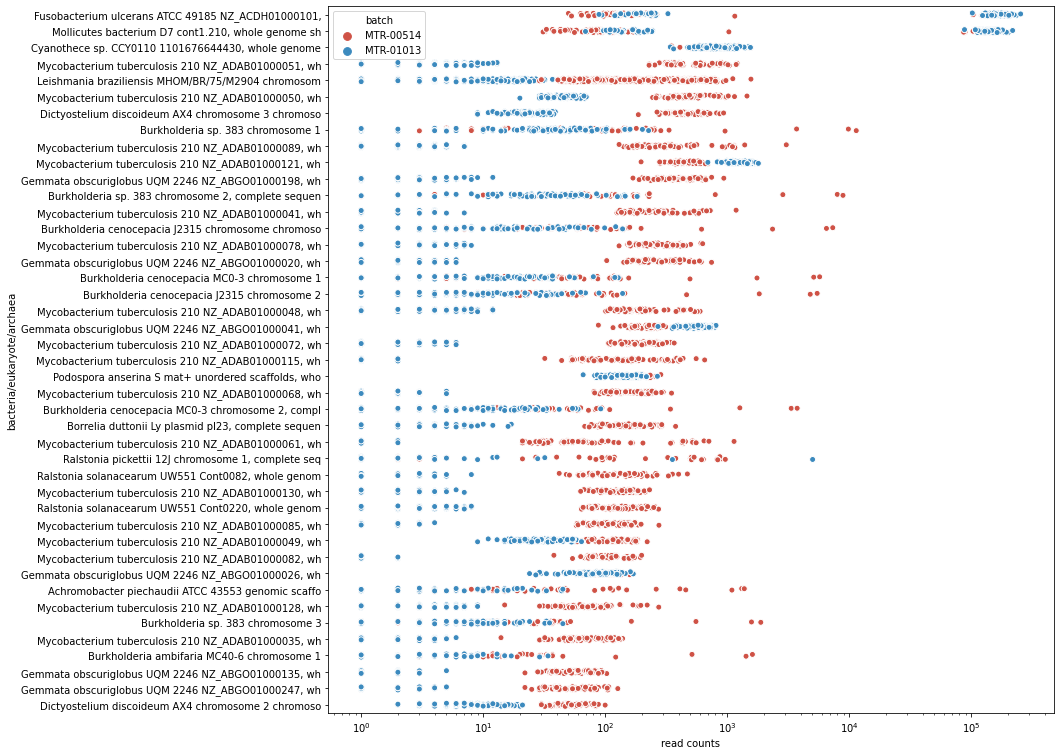

In [70]:
fig, ax = plt.subplots(figsize=(13,13))
ax.set(xscale="log")
chart = sns.stripplot(data=df_melt, x='read counts', y='bacteria/eukaryote/archaea', hue='batch', orient='h', 
                      linewidth=1, size=6, edgecolor='white', palette=['#cf5246', '#3c8abe'])
plt.show()